<a href="https://colab.research.google.com/github/gauravguptagtm/100-days-of-deep-learning/blob/main/DL_27(Transfer_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We need of transfer learning, when our pretrained model doesn't have that class.

## Ways of doing Transfer Learning

- Feature Extraction
  - We take conv_base layers from pretrained model.
  - And attach FC layers according to youself.
  - We freeze the conv_base and only train FC layers.
- Fine Tuning
  - In finetuning, we also train some last part of conv_base.

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:09<00:00, 167MB/s]
100% 1.06G/1.06G [00:09<00:00, 116MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [7]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
conv_base.trainable = False

In [9]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 110ms/step - loss: 0.0398 - accuracy: 0.9862 - val_loss: 0.3634 - val_accuracy: 0.9116
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.0219 - accuracy: 0.9924 - val_loss: 0.4242 - val_accuracy: 0.9074
Epoch 3/10
625/625 [==============================] - 59s 93ms/step - loss: 0.0243 - accuracy: 0.9919 - val_loss: 0.4233 - val_accuracy: 0.9092
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.4355 - val_accuracy: 0.9106
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.0178 - accuracy: 0.9931 - val_loss: 0.4513 - val_accuracy: 0.9144
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.0127 - accuracy: 0.9955 - val_loss: 0.4711 - val_accuracy: 0.9102
Epoch 7/10
625/625 [==============================] - 60s 95ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.4826 - val_accu

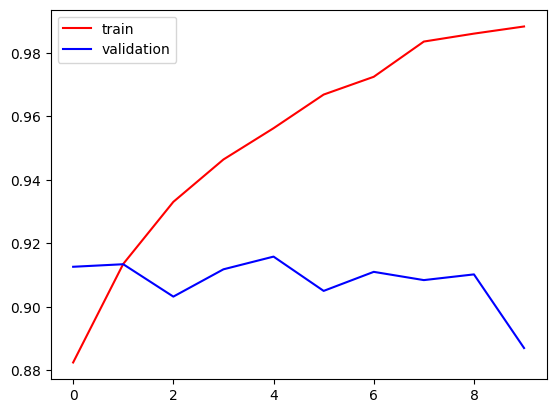

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

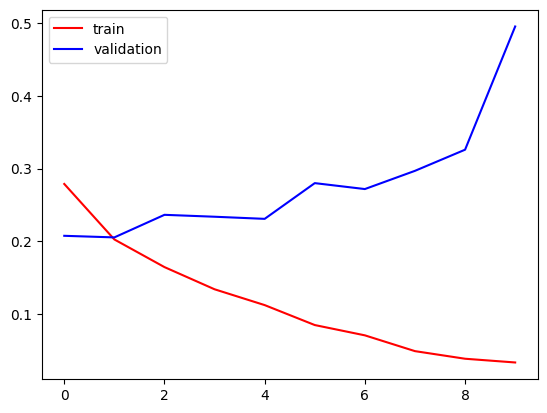

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()